# CM4044 Mini Project 2 

There are many ways to perform molecular property prediction given the rise in cheminformatics. It can be classified into 2 methods: 1) Molecular descriptor based and 2) fingerprint based. 

In method 1, molecular descriptors such as number of atoms, molecular weight etc are commonly used in a regression model or classification model to predict other properties. Often, descriptors used are highly correlated to the target and assumed to be non-correlated with other descriptors used in the prediction task. However, in reality, it is hard to obtain such descriptors and hence the need to search for new methods. 

In method 2, molecules are represented as a vector and feed into prediction models. Representation learning can be done in 2 methods namely 1) Molecular fingerprint, 2) smiles representation 

Molecular fingerprints are vectors which contain indexed (ordered) elements encoding for physicochemical or structural properties. Hashed fingerprints differ from other descriptors by the fact that each feature is generated from the molecule itself, while in keys, patterns are pre-defined. Their lengths can be set prior to their generation and a hash function assigns molecular patterns to (non-unique) bits. In general, there are 2 fingerprint representation that we can generate in RDkit, RDkitfingerprint and morgan fingerprint. Similar to the Daylight fingerprint, RDKit fingerprint is derived from algorithms that identifies subgraphs in the molecule given a particular range of sizes (defaults to between 1 for the minimum and 7 for maximum number of bonds to include in a subgraph). The subgraphs are then hashed, used to seed a RNG, to generate a raw bit ID (2 bits per path by default), the mod of this value is then taken to fit the assigned fingerprint size, then the corresponding bit is set. Morgan....
These 2 methods will be explored in this study. 

Molecules can also be represented with a string of letters known as SMILES. In recent years, improvements have been made to the development of SMILES such that it includes 3D information of a molecules such as its stereochemistry information. More recently, developments to deep learning model and in particular, natural language processing model has enable scientist to develop a model that can learn representation of a molecule by feeding SMILES as an input. Indeed, Jaeger et al developed a model known as Mol2vec, which is a unsupervised model capable of obtaining substructure vector representation by training with ~20M molecules.

# Objective 

In this project, we aim to explore and compare the use of abovementioned methods to predict the aqueous solubility of molecules. 

# 1) Load in delaney dataset 
The dataset can be downloaded here: https://pubs.acs.org/doi/10.1021/ci034243x

The name of the dataset will be renamed as: solubility_dataset.csv 

Molecules are drawn into the csv file for visualisation. This is done using RDKit.

,Compound ID,measured_log,ESOL predicted log(solubility:mol/L),SMILES,Molecule
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,

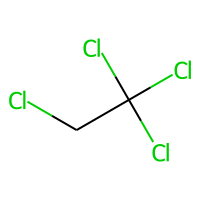
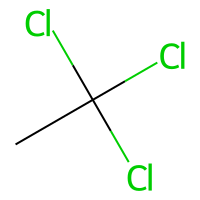
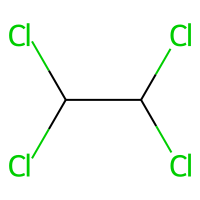
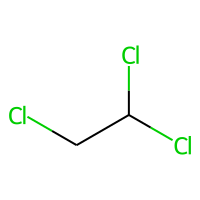
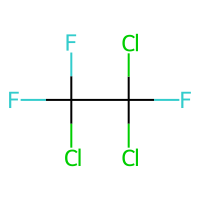

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools

# load in datafile 
df = pd.read_csv('./solubility_dataset.csv')

#print first 5 rows to see
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule')
df.head()

# Exploratory data analysis
The training set was utilised by Delaney in his study on solubility prediction using ESol and of the three sources utilised we have settled on the use of the "Small" set. The “Small” set mainly consists of low molecular weight organic compounds compiled from the literature by Abraham’s group at University College London.

The following frequency distribution shows the range of molecular weights as to how "small" this set of molecules are in actuality, with a mean of 204.6 g/mol, as well as their range of solubilities (in terms of log solubility measured in M).

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors

df["mol_wt"] = [Descriptors.MolWt(i) for i in df['Molecule']]
df.describe()

,measured_log,ESOL predicted log(solubility:mol/L),mol_wt
count,1144.000000,1144.000000,1144.000000
mean,-3.057997,-2.994776,204.631675
std,2.096502,1.686520,102.620500
min,-11.600000,-9.702000,16.043000
25%,-4.332250,-3.962250,122.126000
50%,-2.870500,-2.889000,183.594500
75%,-1.600000,-1.846750,270.715750
max,1.580000,1.091000,780.949000


## <span style="color:green">Distribution of Solubilities

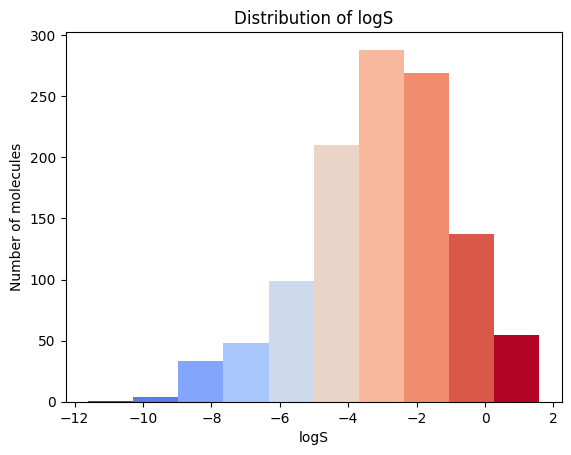

In [4]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('coolwarm')

n, bins, patches = plt.hist(df.measured_log)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))
plt.title("Distribution of logS")
plt.ylabel("Number of molecules")
plt.xlabel("logS")
plt.show()

## <span style="color:green">Distribution of molecular weights

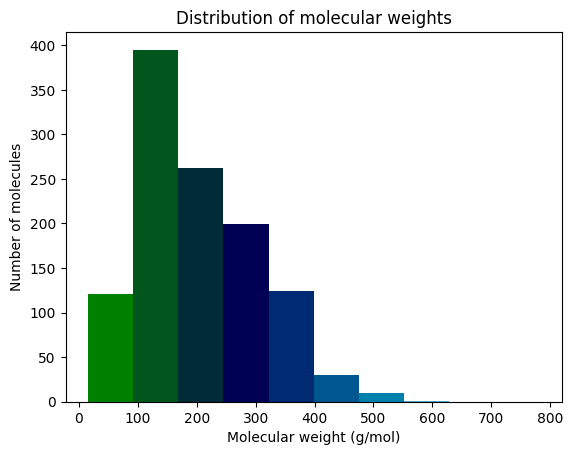

In [38]:
cmap = plt.get_cmap('ocean')

n, bins, patches = plt.hist(df.mol_wt)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))
plt.title("Distribution of molecular weights")
plt.ylabel("Number of molecules")
plt.xlabel("Molecular weight (g/mol)")
plt.show()

## <span style="color:orange">5 least soluble molecules in water

,Compound ID,measured_log,ESOL predicted log(solubility:mol/L),SMILES,Molecule,mol_wt
116,"2,2',3,3',4,4',5,5',6,6'-PCB",-11.600,-9.589,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,,498.662
519,Coronene,-9.332,-6.885,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67,,300.360
117,"2,2',3,3',4,4',5,5'-PCB",-9.160,-8.468,Clc1cc(c(Cl)c(Cl)c1Cl)c2cc(Cl)c(Cl)c(Cl)c2Cl,,429.772
119,"2,2',3,3',5,5',6,6'-PCB",-9.150,-8.304,Clc1cc(Cl)c(Cl)c(c1Cl)c2c(Cl)c(Cl)cc(Cl)c2Cl,,429.772
427,Benzo[ghi]perylene,-9.018,-6.446,c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56,,276.338

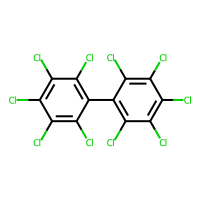
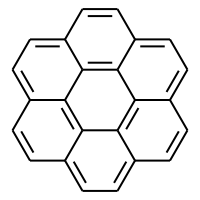
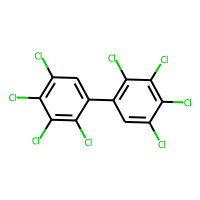
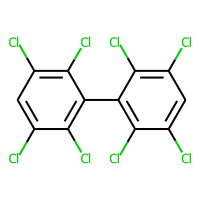
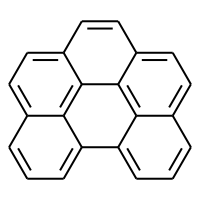

In [6]:
data_by_sol = df.sort_values(by = "measured_log")
bot_5 = data_by_sol.head()
bot_5

## <span style="color:blue">5 most soluble molecules in water

,Compound ID,measured_log,ESOL predicted log(solubility:mol/L),SMILES,Molecule,mol_wt
710,Glycerol,1.120,0.688,OCC(O)CO,,92.094
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),,287.343
819,Methyl hydrazine,1.340,0.543,CNN,,46.073
801,Methanol,1.570,0.441,CO,,32.042
361,Acetamide,1.580,0.494,CC(=O)N,,59.068

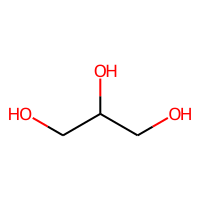
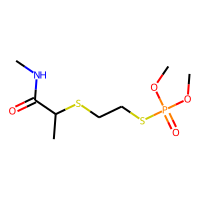
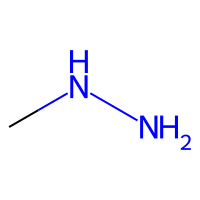
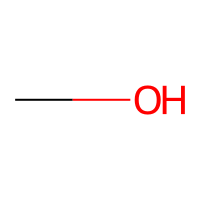
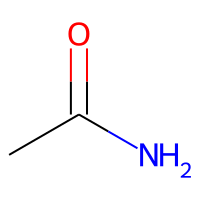

In [7]:
top_5 = data_by_sol.tail()
top_5

# 2) Fingerprinting method
## Visualising fingerprints

## RDkit Fingerprint

In [5]:
import numpy as np

def rdkfp_as_array( mol, maxPath = 7 ):
    rdkfp = Chem.rdmolops.RDKFingerprint(mol, minPath=1, maxPath=maxPath, fpSize = 2048)
    return np.array(rdkfp)

### Visualising what each bit encode in a molecule

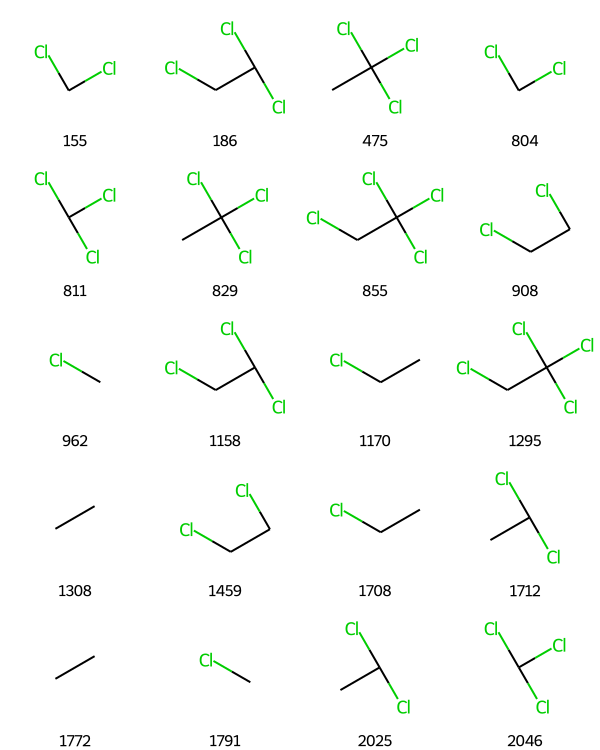

In [10]:
rdkbi = {}
first_mol = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')
rdkfp = Chem.RDKFingerprint(first_mol, maxPath=7, bitInfo=rdkbi)

tpls = [(first_mol,x,rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(tpls,molsPerRow=4,legends=[str(x) for x in rdkbi])

In [14]:
rdkfp_list=[]

for mol in df['Molecule']:
    rdkfp = rdkfp_as_array(mol)
    rdkfp_list.append(rdkfp)

rdkfp_df = pd.DataFrame(rdkfp_list)
rdkfp_df.to_csv('./rdkfp.csv')

### Visualising molecules embedding using UMAP

In essence, UMAP converts embedding to a simple 2D matrix which can then be plotted on a 2D plot. In a UMAP plot, one can identify if the clusters do indeed happen due to the presence of similar substructure and also from there show whether if there is a qualitative relationship between the clusters and solubilities

In [343]:
rdkfp_df = pd.read_csv('./rdkfp.csv')
import umap
reducer_rdk = umap.UMAP(n_neighbors = 15, min_dist = 0.0, random_state=42, metric='cosine')
reducer_rdk.fit(rdkfp_df)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [344]:
import numpy as np
embedding_rdk = reducer_rdk.transform(rdkfp_df)
embedding_rdk.shape

(1144, 2)

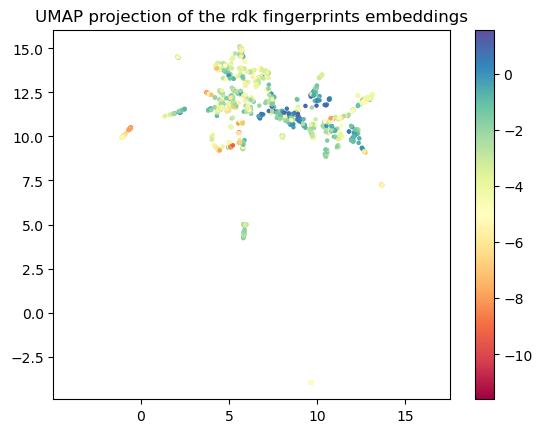

In [365]:
sc = plt.scatter(embedding_rdk[:, 0], embedding_rdk[:, 1], c = solubility_df, cmap='Spectral', s=5)
plt.colorbar(sc)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the rdk fingerprints embeddings')
plt.savefig('./umap_proj_rdkfp_c.png')

## Morgan Fingerprint

In [19]:
def get_fps(mol,radius,nBits):
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol,radius=radius, nBits=nBits)
    return np.array(morgan_fp)

### Visualing what each bit encode for in a molecule 

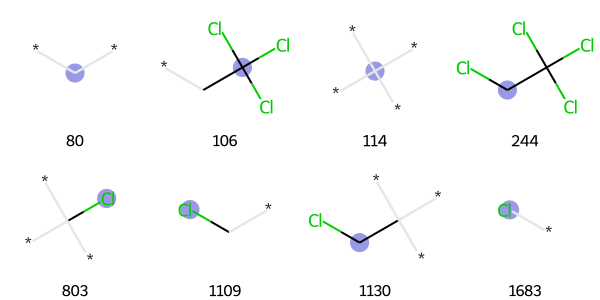

In [16]:
mfpbi = {}
first_mol = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')
first_mol_mfp = AllChem.GetMorganFingerprintAsBitVect(first_mol, radius=2, nBits=2048, bitInfo=mfpbi)

tpls = [(first_mol,x,mfpbi) for x in first_mol_mfp.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in first_mol_mfp.GetOnBits()])

In [21]:
mfp_list=[]

for mol in df['Molecule']:
    mfp = get_fps(mol, radius=2, nBits=2048)
    mfp_list.append(mfp)

mfp_df = pd.DataFrame(mfp_list)
mfp_df.to_csv('./mfp.csv')

### UMAP Projections

In [339]:
mfp_df = pd.read_csv('./mfp.csv')
reducer_mfp = umap.UMAP(n_neighbors = 15, min_dist = 0.0, random_state=42, metric='cosine')
reducer_mfp.fit(mfp_df)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [340]:
import numpy as np
embedding_mfp = reducer_mfp.transform(mfp_df)
embedding_mfp.shape

(1144, 2)

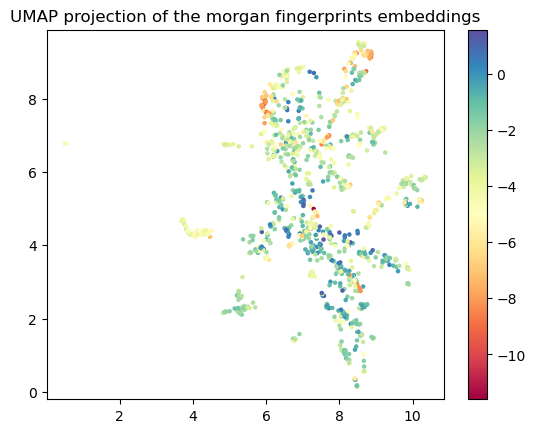

In [364]:
import matplotlib.pyplot as plt 

sc2 = plt.scatter(embedding_mfp[:, 0], embedding_mfp[:, 1], c = solubility_df, cmap='Spectral', s=5)
plt.colorbar(sc2)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the morgan fingerprints embeddings')
plt.savefig('./umap_prog_mfp_c.png')

## Mol2vec model

In [2]:
import deepchem as dc

mol2vec_list = []
featuriser = dc.feat.Mol2VecFingerprint()
for smile in df['SMILES']:
    features = featuriser.featurize(smile)
    mol2vec_list.append(features)

In [24]:
import numpy as np

result_array = np.array(mol2vec_list)
reshape_mol2vec = result_array.reshape(1144,300)
df_mol2vec = pd.DataFrame(reshape_mol2vec)
df_mol2vec.to_csv('./mol2vec.csv')

## Viewing information on the vector representation using mol2vec

In [3]:
m2v_df = pd.read_csv('./mol2vec.csv')
m2v_df.iloc[1,1:].describe()

count    300.000000
mean       0.013625
std        1.791373
min       -4.448598
25%       -1.179472
50%       -0.051507
75%        1.185614
max        4.418523
Name: 1, dtype: float64

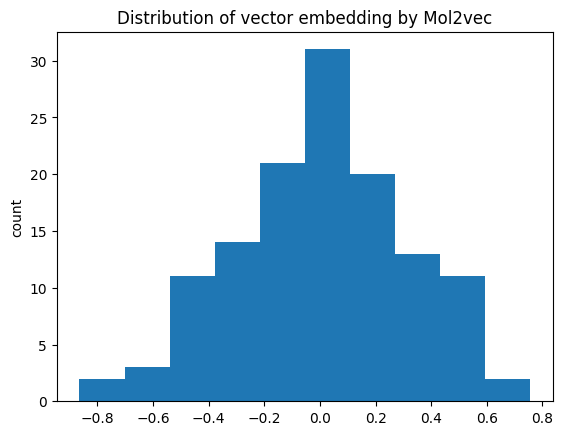

In [ ]:
plt.hist(m2v_df.iloc[1,1:])
plt.ylabel('count')
plt.title('Distribution of vector embedding by Mol2vec')
plt.savefig('./mol2vec_dist.png')
plt.show()

## Comparing the similarity between 2 vector representations of 2 molecules obtained by mol2vec

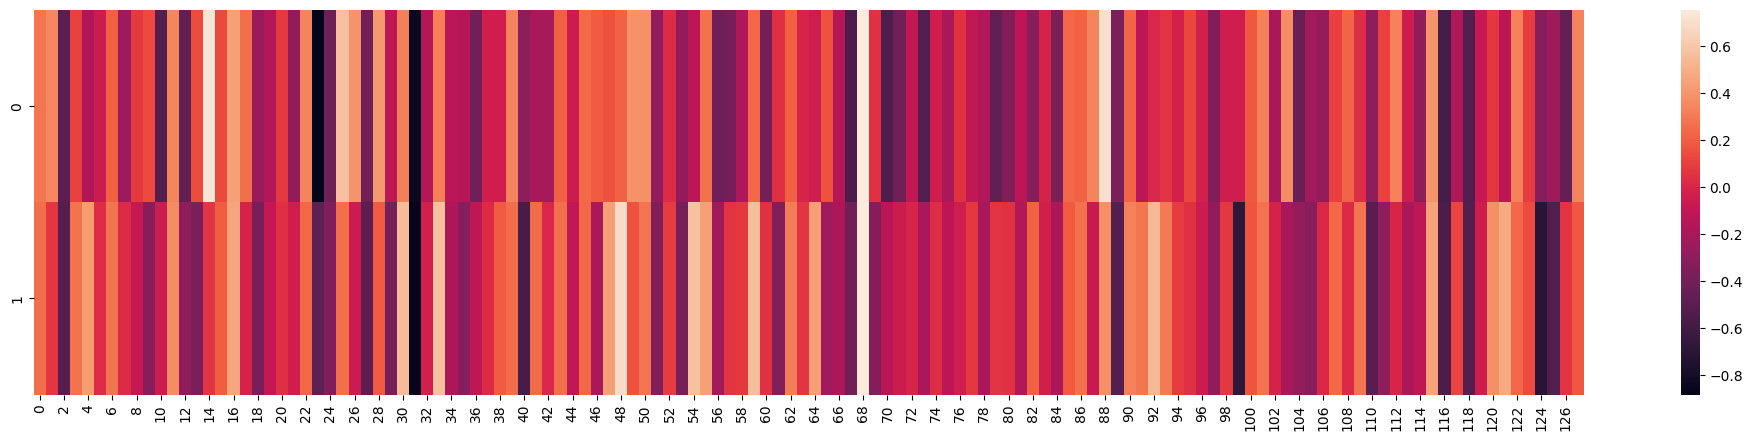

In [ ]:
first2_m2v = m2v_df.iloc[0:2, 1:]
fig, ax = plt.subplots(figsize=(25,5)) 
sn.heatmap(first2_m2v, ax=ax)
plt.savefig('./mol2vec_first2.png')

### UMAP Projections

In [335]:
reducer = umap.UMAP(n_neighbors = 15, min_dist = 0.0, random_state=42, metric='cosine')
reducer.fit(m2v_df)


UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [336]:
embedding = reducer.transform(m2v_df)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1144, 2)

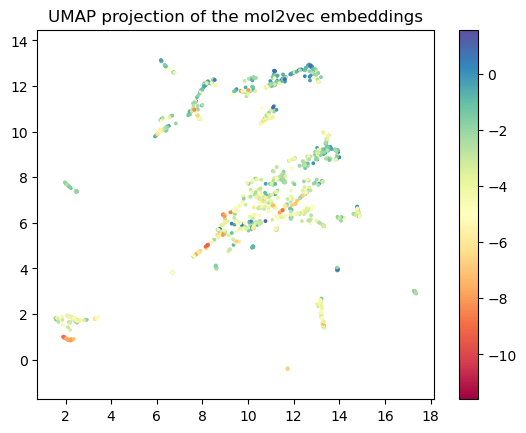

In [363]:
sc3= plt.scatter(embedding[:, 0], embedding[:, 1], c= solubility_df, cmap='Spectral', s=3)
plt.colorbar(sc3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the mol2vec embeddings')
plt.savefig('./umap_proj_m2v_c.png')

# Graph2vec

In [25]:
from rdkit import Chem
import networkx as nx 
from karateclub import Graph2Vec

In [26]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

In [27]:
df['graph'] = df['Molecule'].apply(lambda x: mol_to_nx(x))

In [28]:
model_g2v = Graph2Vec(wl_iterations=3, dimensions=300, epochs=400)
model_g2v.fit(df['graph'])
mol_graph2vec = model_g2v.get_embedding()
mol_g2v_df = pd.DataFrame(mol_graph2vec)
mol_g2v_df.to_csv('./graph2vec_300.csv')

## viewing the graph object generated by networkx

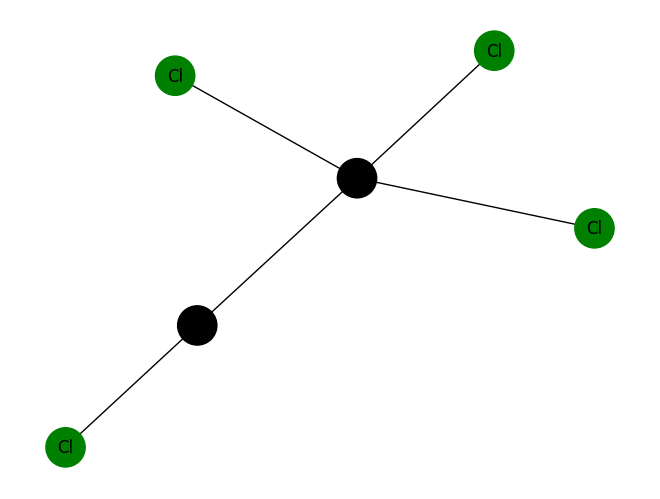

In [ ]:
first_mol_nx = df['graph'][0]

first_mol_atom = nx.get_node_attributes(first_mol_nx, 'atom_symbol')

color_map = {'C': 'black',
             'Cl': 'green'}  

first_mol_colors = []
for idx in first_mol_nx.nodes():
    if (first_mol_nx.nodes[idx]['atom_symbol'] in color_map):
        first_mol_colors.append(color_map[first_mol_nx.nodes[idx]['atom_symbol']])
    else:
        first_mol_colors.append('gray')
    
nx.draw(first_mol_nx,
        labels=first_mol_atom,
        with_labels = True,
        node_color=first_mol_colors,
        node_size=800)

plt.savefig('./g2v_first_mol.png')
plt.show()

## Viewing the vector representation created by graph2vec

In [29]:
g2v_df = pd.read_csv('./graph2vec_300.csv')

In [ ]:
first_g2v = g2v_df.iloc[1, 1:]
first_g2v.describe()

count    128.000000
mean       0.005075
std        0.316991
min       -0.864570
25%       -0.190989
50%        0.020477
75%        0.239570
max        0.756479
Name: 1, dtype: float64

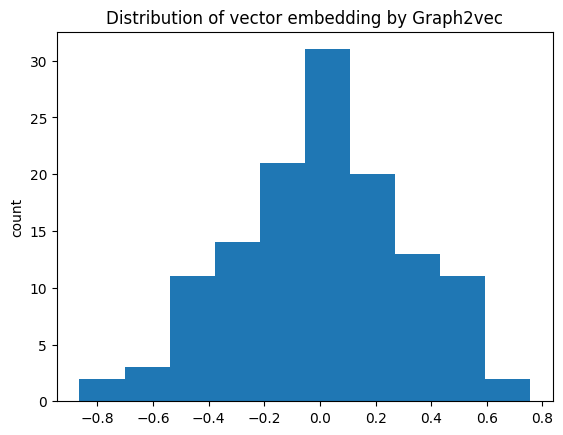

In [ ]:
plt.hist(first_g2v)
plt.ylabel('count')
plt.title('Distribution of vector embedding by Graph2vec')
plt.savefig('./graph2vec_dist.png')
plt.show()

## Comparing the similarity between the first 2 molecules

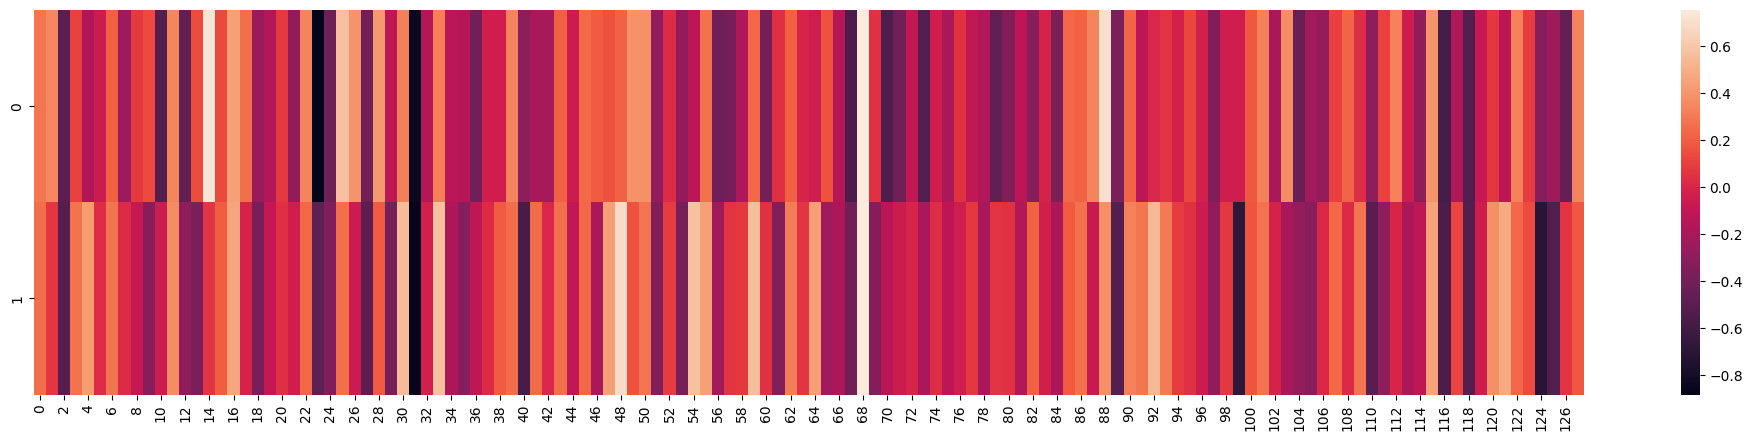

In [ ]:
import seaborn as sn
g2v_df = pd.read_csv('./graph2vec.csv')
import matplotlib.pyplot as plt
first2_g2v = g2v_df.iloc[0:2, 1:]
fig, ax = plt.subplots(figsize=(25,5)) 
sn.heatmap(first2_g2v, ax=ax)
plt.savefig('./graph2vec_first2.png')

In [299]:
reducer_g2v = umap.UMAP(n_neighbors = 15, min_dist = 0.0, random_state=42, metric='cosine')
reducer_g2v.fit(g2v_df)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [300]:
embedding_g2v = reducer_g2v.transform(g2v_df)
assert(np.all(embedding_g2v == reducer_g2v.embedding_))
embedding_g2v.shape

(1144, 2)

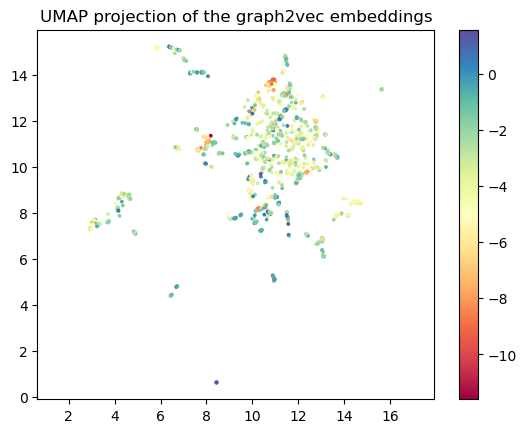

In [362]:
sc4 = plt.scatter(embedding_g2v[:, 0], embedding_g2v[:, 1], c=solubility_df, cmap='Spectral', s=3)
plt.colorbar(sc4)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the graph2vec embeddings')
plt.savefig('./umap_proj_g2v_c.png')

# Split data

In [8]:
from sklearn.model_selection import train_test_split

solubility_df = df['measured_log']
rdkfp_df = pd.read_csv('./rdkfp.csv')
rdkfp_df = rdkfp_df.iloc[:,1:]
mfp_df = pd.read_csv('./mfp.csv')
mfp_df = mfp_df.iloc[:,1:]
m2v_df = pd.read_csv('./mol2vec.csv')
m2v_df = m2v_df.iloc[:,1:]
g2v_df = pd.read_csv('./graph2vec.csv')
g2v_df = g2v_df.iloc[:,1:]

X_train_rdk, X_test_rdk, y_train_rdk, y_test_rdk = train_test_split(rdkfp_df, solubility_df, test_size=0.2, random_state=42)

X_train_mfp, X_test_mfp, y_train_mfp, y_test_mfp = train_test_split(mfp_df, solubility_df, test_size=0.2, random_state=42)

X_train_m2v, X_test_m2v, y_train_m2v, y_test_m2v = train_test_split(m2v_df, solubility_df, test_size=0.2, random_state=42)

X_train_g2v, X_test_g2v, y_train_g2v, y_test_g2v = train_test_split(g2v_df, solubility_df, test_size=0.2, random_state=42)


# Linear model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def linear_model_pred(X_train, y_train, X_test, y_test, filename=''):
    '''
    this func takes in the train and test data, predict, returns mse, r2 and save the predicted values under filename
    '''
    linearmodel = LinearRegression()
    linearmodel.fit(X_train, y_train)
    predictions = linearmodel.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    np.savetxt(filename, predictions, delimiter=',')

    return mse, r2, predictions


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

mse_rdk, r2_rdk, pred_rdk = linear_model_pred(X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk, filename='./linear_model_predictions/y_pred_rdk_linear.csv')
mse_mfp, r2_mfp, pred_mfp = linear_model_pred(X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp, filename='./linear_model_predictions/y_pred_mfp_linear.csv')
mse_m2v, r2_m2v, pred_m2v = linear_model_pred(X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v, filename='./linear_model_predictions/y_pred_m2v_linear.csv')
mse_g2v, r2_g2v, pred_g2v = linear_model_pred(X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v, filename='./linear_model_predictions/y_pred_g2v_linear.csv')

print(f'mse for linear model using rdk: {mse_rdk}')
print(f'r2 score for linear model using rdk: {r2_rdk}')

print(f'mse for linear model using mfp: {mse_mfp}')
print(f'r2 score for linear model using mfp: {r2_mfp}')

print(f'mse for linear model using m2v: {mse_m2v}')
print(f'r2 score for linear model using m2v: {r2_m2v}')

print(f'mse for linear model using g2v: {mse_g2v}')
print(f'r2 score for linear model using g2v: {r2_g2v}')

mse for linear model using rdk: 6.047119268790928
r2 score for linear model using rdk: -0.388692204069349
mse for linear model using mfp: 1.9149412433510868e+16
r2 score for linear model using mfp: -4397571567038429.0
mse for linear model using m2v: 1.0876658273176822
r2 score for linear model using m2v: 0.7502227113620825
mse for linear model using g2v: 2.406232983265622
r2 score for linear model using g2v: 0.44742002985107143


In [37]:
np.savetxt('./linear_model_predictions/y_pred_rdk_linear.csv', pred_rdk, delimiter=',')
np.savetxt('./linear_model_predictions/y_pred_mfp_linear.csv', pred_mfp, delimiter=',')
np.savetxt('./linear_model_predictions/y_pred_m2v_linear.csv', pred_m2v, delimiter=',')
np.savetxt('./linear_model_predictions/y_pred_g2v_linear.csv', pred_g2v, delimiter=',')

# Conclusion for using linear model

r2 score for mol2vec is the best at 0.75, followed by graph2vec which is at 0.44. The other 2 fingerprints did not yield any reasonable r2 score. 

# Random forest

### Grid generation

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 4, 8]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]
random_state = [42]
verbose = [1]

grid = {'n_estimators': n_estimators,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': ['auto', 'sqrt'],
        'bootstrap': bootstrap,
        'random_state': random_state,
        'verbose': verbose}

# pprint(grid)

### Random Forest Function

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def RDF(x_train, y_train, x_test, y_test, filename = ""):

  RDF = RandomForestRegressor(random_state=42)
  RDF.fit(x_train, y_train)

  y_pred_rdk = RDF.predict(x_test)
  pd.DataFrame(y_pred_rdk).to_csv(filename)
  params = RDF.get_params()

  for key in grid.keys():
    print(f"{key}:{params[key]}")

  print('RDK r^2 score =',r2_score(y_test, y_pred_rdk))
  print('RDK MSE =',mean_squared_error(y_test, y_pred_rdk))

### Grid search function

In [11]:
def grid_search_RDF(x_train, y_train, x_test, y_test, filename = ""):

  RDF = RandomForestRegressor()
  grid_RDF = GridSearchCV(estimator=RDF, param_grid = grid, cv = 5, n_jobs=-1,verbose=2)
  grid_RDF.fit(x_train, y_train)

  print(" Results from Grid Search " )
  print("\n The best estimator across ALL searched params:\n",grid_RDF.best_estimator_)
  print("\n The best score across ALL searched params:\n",grid_RDF.best_score_)
  print("\n The best parameters across ALL searched params:\n",grid_RDF.best_params_)
  
  bestrdkmodel = grid_RDF.best_estimator_
  y_pred_rdk = bestrdkmodel.predict(x_test)
  pd.DataFrame(y_pred_rdk).to_csv(filename)
  print('RDK r^2 score =',r2_score(y_test, y_pred_rdk))
  print('RDK MSE =',mean_squared_error(y_test, y_pred_rdk))
  return grid_RDF

rdk no grid search

In [12]:
RDF(X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk, filename = "RDK_Randomforest_untuned.csv")

#RDK r^2 score = 0.8171247485006795
#RDK MSE = 0.7963380610087321

n_estimators:100
min_samples_split:2
min_samples_leaf:1
max_features:1.0
bootstrap:True
random_state:42
verbose:0
RDK r^2 score = 0.8171247485006795
RDK MSE = 0.7963380610087321


rdk grid search

In [ ]:
grid_search_RDF(X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk, filename = "RDK_Randomforest.csv")

#The best parameters across ALL searched params:
#{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 42, 'verbose': 1}
#RDK r^2 score = 0.8350385603812636
#RDK MSE = 0.7183316052346306

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000, random_state=42, verbose=1)

 The best score across ALL searched params:
 0.7675703937023435

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 42, 'verbose': 1}
RDK r^2 score = 0.7540747539861634
RDK MSE = 0.7183316052346306


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 400, 700, 1000],
                         'random_state': [42], 'verbose': [1]},
             verbose=2)

morgan no grid search

In [18]:
RDF(X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp, filename = "MOR_Randomforest_untuned.csv")

#RDK r^2 score = 0.698464125298893
#RDK MSE = 1.313050791812274

n_estimators:100
min_samples_split:2
min_samples_leaf:1
max_features:1.0
bootstrap:True
random_state:42
verbose:0
RDK r^2 score = 0.698464125298893
RDK MSE = 1.3130507918122742


morgan grid search

In [ ]:
grid_search_RDF(X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp, filename = "MOR_Randomforest.csv")

#The best parameters across ALL searched params:
#{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42, 'verbose': 1}
#RDK r^2 score = 0.7430375217458416
#RDK MSE = 1.118954041114062

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=700,
                      random_state=42, verbose=1)

 The best score across ALL searched params:
 0.6872035723178931

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42, 'verbose': 1}
RDK r^2 score = 0.5751560597853573
RDK MSE = 1.118954041114062


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 400, 700, 1000],
                         'random_state': [42], 'verbose': [1]},
             verbose=2)

mol2vec no grid search

In [19]:
RDF(X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v, filename = "M2V_Randomforest_untuned.csv")

#RDK r^2 score = 0.8210506364354395
#RDK MSE = 0.7792426150144118

n_estimators:100
min_samples_split:2
min_samples_leaf:1
max_features:1.0
bootstrap:True
random_state:42
verbose:0
RDK r^2 score = 0.820923935205689
RDK MSE = 0.7797943409084285


mol2vec grid search

In [ ]:
grid_search_RDF(X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v, filename = "M2V_Randomforest.csv")

#The best parameters across ALL searched params:
#{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42, 'verbose': 1}
#RDK r^2 score = 0.8253974430196056
#RDK MSE = 0.7603142608580392

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=700,
                      random_state=42, verbose=1)

 The best score across ALL searched params:
 0.8021847695982739

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42, 'verbose': 1}
RDK r^2 score = 0.7457599917794907
RDK MSE = 0.7603142608580392


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 400, 700, 1000],
                         'random_state': [42], 'verbose': [1]},
             verbose=2)

graph2vec no grid search

In [20]:
RDF(X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v, filename = "G2V_Randomforest_untuned.csv")

#RDK r^2 score = 0.4459280753438152
#RDK MSE = 2.4127297626257644

n_estimators:100
min_samples_split:2
min_samples_leaf:1
max_features:1.0
bootstrap:True
random_state:42
verbose:0
RDK r^2 score = 0.4459280753438152
RDK MSE = 2.4127297626257644


graph2vec grid search

In [ ]:
grid_search_RDF(X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v, filename = "G2V_Randomforest.csv")

#The best parameters across ALL searched params:
#{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 42, 'verbose': 1}
#RDK r^2 score = 0.4883702434075228
#RDK MSE = 2.227913536571332

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000,
                      random_state=42, verbose=1)

 The best score across ALL searched params:
 0.47517713177368553

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 42, 'verbose': 1}
RDK r^2 score = -0.3093756360876765
RDK MSE = 2.227913536571332


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 400, 700, 1000],
                         'random_state': [42], 'verbose': [1]},
             verbose=2)

# Conclusion after using random tree forest regressor

Surprisingly, rdkit fingerprint (0.84) tops the accuracy here followed by mol2vec (0.83), and then morgan fingerprint (0.74) and lastly graph2vec (0.49).

# Gradient boosting model

### GridSearch Function

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

def grid_search_GBR(x_train, y_train, x_test, y_test, filename = ""):

  GBR = GradientBoostingRegressor()
  grid_GBR = GridSearchCV(estimator=GBR, param_grid = grid, cv = 5, n_jobs=-1,verbose=3)
  grid_GBR.fit(x_train, y_train)

  print(" Results from Grid Search " )
  print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
  print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
  print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
  
  bestrdkmodel = grid_GBR.best_estimator_
  y_pred_rdk = bestrdkmodel.predict(x_test)
  pd.DataFrame(y_pred_rdk).to_csv(filename)
  print('r^2 score =',r2_score(y_test,y_pred_rdk))
  print('MSE =',mean_squared_error(y_test,y_pred_rdk))
  return grid_GBR

### RDkit fingerprints

In [ ]:
grid = {
        'learning_rate': [0.01,0.02,0.03],
        'subsample'    : [0.5,0.2,0.1],
        'n_estimators' : [1000,1500,2000],
        'max_depth'    : [6,8,10]
        }
        
rdk_grid_GBR = grid_search_GBR(X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk, filename = "RDK_GradientBoostingRegressor.csv")

#The best parameters across ALL searched params:
#{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.2}
#r^2 score = 0.8428111031485469
#MSE = 0.669253128990628

Fitting 5 folds for each of 81 candidates, totalling 405 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.7938589091548944

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.2}
r^2 score = 0.8098981242631826
MSE = 0.669253128990628


### Morgan fingerprints

In [ ]:
grid = {
        'learning_rate': [0.01,0.02,0.03],
        'subsample'    : [0.5,0.2,0.1],
        'n_estimators' : [1000,1500,2000],
        'max_depth'    : [6,8,10]
        }

mor_grid_GBR = grid_search_GBR(X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp, filename = "MOR_GradientBoostingRegressor.csv")

#The best parameters across ALL searched params:
#{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 1500, 'subsample': 0.5}
#r^2 score = 0.759117738633394
#MSE = 1.0489320527266337

### Mol2Vec

In [ ]:
grid = {
        'learning_rate': [0.01,0.02,0.03],
        'subsample'    : [0.5,0.2,0.1],
        'n_estimators' : [1000,1500,2000],
        'max_depth'    : [6,8,10]
        }

m2v_grid_GBR = grid_search_GBR(X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v, filename = "M2V_GradientBoostingRegressor.csv")

#The best parameters across ALL searched params:
#{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.2}
#r^2 score = 0.8800827702136109
#MSE = 0.5221846776242791

### Graph2Vec

In [ ]:
grid = {
        'learning_rate': [0.01,0.02,0.03],
        'subsample'    : [0.5,0.2,0.1],
        'n_estimators' : [1000,1500,2000],
        'max_depth'    : [6,8,10]
        }
        
g2v_grid_GBR = grid_search_GBR(X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v, filename = "G2V_GradientBoostingRegressor.csv")

#The best parameters across ALL searched params:
#{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}
#r^2 score = 0.49627739754506184
#MSE = 2.193481497559162

# Conclusion for using Gradient boosting model

Similar to linear model result, the r2 score using mol2vec is the highest (0.84), followed by rdkit fingerprint (0.80), morgan fingerprint (0.68) and then graph2vec (-0.11)

# Gaussian process regressor

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, DotProduct, RationalQuadratic, ExpSineSquared
from sklearn.metrics import r2_score, mean_squared_error

def kerneltest(fp_type, X_train, Y_train, X_test, Y_test):
    print(fp_type,'\n')
    for i in [Matern, WhiteKernel, RBF, DotProduct, RationalQuadratic]:
        for j in [Matern, WhiteKernel, RBF, DotProduct, RationalQuadratic]:
            kernel = 1.0 * i() + j()
            gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer= 0, normalize_y=True, alpha= 1e-10)
            gp.fit(X_train, Y_train)
            pred_val, sigma = gp.predict(X_test, return_std=True)
            GPR_mse = mean_squared_error(Y_test, pred_val)
            GPR_r2 = r2_score(Y_test, pred_val)
            print(f'GPR kernel: {gp.kernel_}\nMean squared error: {GPR_mse}\nR squared: {GPR_r2}\n')
    return None

def main(kernel, fp_type, X_train, Y_train, X_test, Y_test):
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer= 0, normalize_y=True, alpha= 1e-10)
    gp.fit(X_train, Y_train)
    pred_val, sigma = gp.predict(X_test, return_std=True)

    GPR_mse = mean_squared_error(Y_test, pred_val)
    GPR_r2 = r2_score(Y_test, pred_val)
    return fp_type, GPR_mse, GPR_r2, gp.kernel_, pred_val

### Kernel Testing
In this section, our initial objective was to get a good gauge on which combination of kernels were best suited for prediction. However, the ExpSineSquared kernel was omitted from the search due to errors in runs as a result of non-positive definite matrixes being returned. Only for Mol2Vec, the DotProduct kernel was also being omitted for the same reason.

RDK Fingerprints

In [ ]:
import warnings
warnings.filterwarnings('ignore')

kerneltest('RDK Fingerprint', X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk)

RDK Fingerprint 

GPR kernel: 316**2 * Matern(length_scale=1e-05, nu=1.5) + Matern(length_scale=1e-05, nu=1.5)
Mean squared error: 3.382696317725504
R squared: 0.2231798652619047

GPR kernel: 0.902**2 * Matern(length_scale=15.7, nu=1.5) + WhiteKernel(noise_level=0.101)
Mean squared error: 0.6722995445053082
R squared: 0.845609604382656

GPR kernel: 238**2 * Matern(length_scale=5.67e+04, nu=1.5) + RBF(length_scale=1.76e-05)
Mean squared error: 17.53614414069188
R squared: -3.0270921698695474

GPR kernel: 1**2 * Matern(length_scale=1, nu=1.5) + DotProduct(sigma_0=1)
Mean squared error: 1.3669471258209565
R squared: 0.6860870883100494

GPR kernel: 1**2 * Matern(length_scale=1, nu=1.5) + RationalQuadratic(alpha=1, length_scale=1)
Mean squared error: 2.2588352716014093
R squared: 0.4812692138984501

GPR kernel: 0.564**2 * WhiteKernel(noise_level=0.318) + Matern(length_scale=18, nu=1.5)
Mean squared error: 0.6539603774015526
R squared: 0.849821106960015

GPR kernel: 0.771**2 * WhiteKernel(no

Morgan Fingerprints

In [ ]:
kerneltest('Morgan Fingerprint', X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp)

Morgan Fingerprint 

GPR kernel: 0.943**2 * Matern(length_scale=1.13, nu=1.5) + Matern(length_scale=1.13, nu=1.5)
Mean squared error: 2.637184455030209
R squared: 0.3943831218454601

GPR kernel: 1.23**2 * Matern(length_scale=8.66, nu=1.5) + WhiteKernel(noise_level=0.13)
Mean squared error: 0.9752798795500751
R squared: 0.7760316102070736

GPR kernel: 1**2 * Matern(length_scale=1, nu=1.5) + RBF(length_scale=1)
Mean squared error: 3.1145682903194833
R squared: 0.2847541926069781

GPR kernel: 4.6**2 * Matern(length_scale=21.3, nu=1.5) + DotProduct(sigma_0=0.0115)
Mean squared error: 1.7698667152430345
R squared: 0.5935585192796693

GPR kernel: 301**2 * Matern(length_scale=1e-05, nu=1.5) + RationalQuadratic(alpha=1.03e-05, length_scale=1e+05)
Mean squared error: 3.938716479272809
R squared: 0.09549247737935918

GPR kernel: 0.598**2 * WhiteKernel(noise_level=0.358) + Matern(length_scale=6.73, nu=1.5)
Mean squared error: 0.9848770438124322
R squared: 0.7738276670401029

GPR kernel: 0.771**2 

Mol2Vec

In [ ]:
kerneltest('M2V', X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v)

M2V 

GPR kernel: 316**2 * Matern(length_scale=1.44, nu=1.5) + Matern(length_scale=8.91e-05, nu=1.5)
Mean squared error: 3.8923359010041914
R squared: 0.10614355677748977

GPR kernel: 1.94**2 * Matern(length_scale=83.8, nu=1.5) + WhiteKernel(noise_level=0.0288)
Mean squared error: 0.3912479792448974
R squared: 0.9101517607831293

GPR kernel: 316**2 * Matern(length_scale=17.4, nu=1.5) + RBF(length_scale=3.21e-05)
Mean squared error: 0.6556039482184479
R squared: 0.84944366873219

GPR kernel: 316**2 * Matern(length_scale=6.05, nu=1.5) + RationalQuadratic(alpha=259, length_scale=0.000951)
Mean squared error: 2.5986194033502734
R squared: 0.40323940270200853

GPR kernel: 0.398**2 * WhiteKernel(noise_level=0.158) + Matern(length_scale=43.5, nu=1.5)
Mean squared error: 0.4112118197792036
R squared: 0.9055671596729187

GPR kernel: 0.771**2 * WhiteKernel(noise_level=0.594) + WhiteKernel(noise_level=0.647)
Mean squared error: 4.361496143484559
R squared: -0.0015968634510727941

GPR kernel: 0.43

Graph2Vec

In [ ]:
kerneltest('G2V', X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v)

G2V 

GPR kernel: 1.65**2 * Matern(length_scale=12.4, nu=1.5) + Matern(length_scale=0.31, nu=1.5)
Mean squared error: 2.1554334895528084
R squared: 0.505014941778972

GPR kernel: 1.06**2 * Matern(length_scale=3.62, nu=1.5) + WhiteKernel(noise_level=0.348)
Mean squared error: 1.9891059894069127
R squared: 0.5432112617965084

GPR kernel: 0.638**2 * Matern(length_scale=0.13, nu=1.5) + RBF(length_scale=2.69)
Mean squared error: 2.065575554277211
R squared: 0.5256503896086524

GPR kernel: 0.749**2 * Matern(length_scale=0.19, nu=1.5) + DotProduct(sigma_0=1.99)
Mean squared error: 2.0412255299263182
R squared: 0.5312422569891257

GPR kernel: 0.611**2 * Matern(length_scale=0.104, nu=1.5) + RationalQuadratic(alpha=0.968, length_scale=2.52)
Mean squared error: 2.001679104556104
R squared: 0.540323905650143

GPR kernel: 0.768**2 * WhiteKernel(noise_level=0.59) + Matern(length_scale=3.37, nu=1.5)
Mean squared error: 1.9971993751205988
R squared: 0.5413526542272601

GPR kernel: 0.771**2 * WhiteKern

### Main Kernel

In [15]:
kernel = 1.0 * Matern() + WhiteKernel()
fp_type, GPR_mse, GPR_r2, kernel_gp, pred_val = main(kernel, "RDKit FP", X_train_rdk, y_train_rdk, X_test_rdk, y_test_rdk)
np.savetxt('./gaussian_process_regressor_predictions/rdkfp_gpr_predictions.csv', pred_val, delimiter=',')

print(f"For {fp_type}\nMean squared error: {GPR_mse}\nR squared: {GPR_r2}\nGPR kernel: {kernel_gp}")

For RDKit FP
Mean squared error: 0.6722995445053107
R squared: 0.8456096043826553
GPR kernel: 0.902**2 * Matern(length_scale=15.7, nu=1.5) + WhiteKernel(noise_level=0.101)


In [16]:
kernel=1.0 * Matern() + WhiteKernel()
fp_type, GPR_mse, GPR_r2, kernel, pred_val = main(kernel, "Morgan FP", X_train_mfp, y_train_mfp, X_test_mfp, y_test_mfp)
np.savetxt('./gaussian_process_regressor_predictions/mfp_gpr_predictions.csv', pred_val, delimiter=',')

print(f"For {fp_type}\nMean squared error: {GPR_mse}\nR squared: {GPR_r2}\nGPR kernel: {kernel_gp}")

For Morgan FP
Mean squared error: 0.9752798795500603
R squared: 0.7760316102070769
GPR kernel: 0.902**2 * Matern(length_scale=15.7, nu=1.5) + WhiteKernel(noise_level=0.101)


In [17]:
kernel=1.0 * Matern() + WhiteKernel()
fp_type, GPR_mse, GPR_r2, kernel, pred_val = main(kernel, "mol2vec FP", X_train_m2v, y_train_m2v, X_test_m2v, y_test_m2v)
np.savetxt('./gaussian_process_regressor_predictions/m2v_gpr_predictions.csv', pred_val, delimiter=',')

print(f"For {fp_type}\nMean squared error: {GPR_mse}\nR squared: {GPR_r2}\nGPR kernel: {kernel_gp}")

For mol2vec FP
Mean squared error: 0.3912479792449557
R squared: 0.9101517607831159
GPR kernel: 0.902**2 * Matern(length_scale=15.7, nu=1.5) + WhiteKernel(noise_level=0.101)


In [18]:
kernel=1.0 * Matern() + WhiteKernel()
fp_type, GPR_mse, GPR_r2, kernel, pred_val = main(kernel, "graph2vec FP", X_train_g2v, y_train_g2v, X_test_g2v, y_test_g2v)
np.savetxt('./gaussian_process_regressor_predictions/g2v_gpr_predictions.csv', pred_val, delimiter=',')

print(f"For {fp_type}\nMean squared error: {GPR_mse}\nR squared: {GPR_r2}\nGPR kernel: {kernel_gp}")

For graph2vec FP
Mean squared error: 1.9891059894069185
R squared: 0.543211261796507
GPR kernel: 0.902**2 * Matern(length_scale=15.7, nu=1.5) + WhiteKernel(noise_level=0.101)


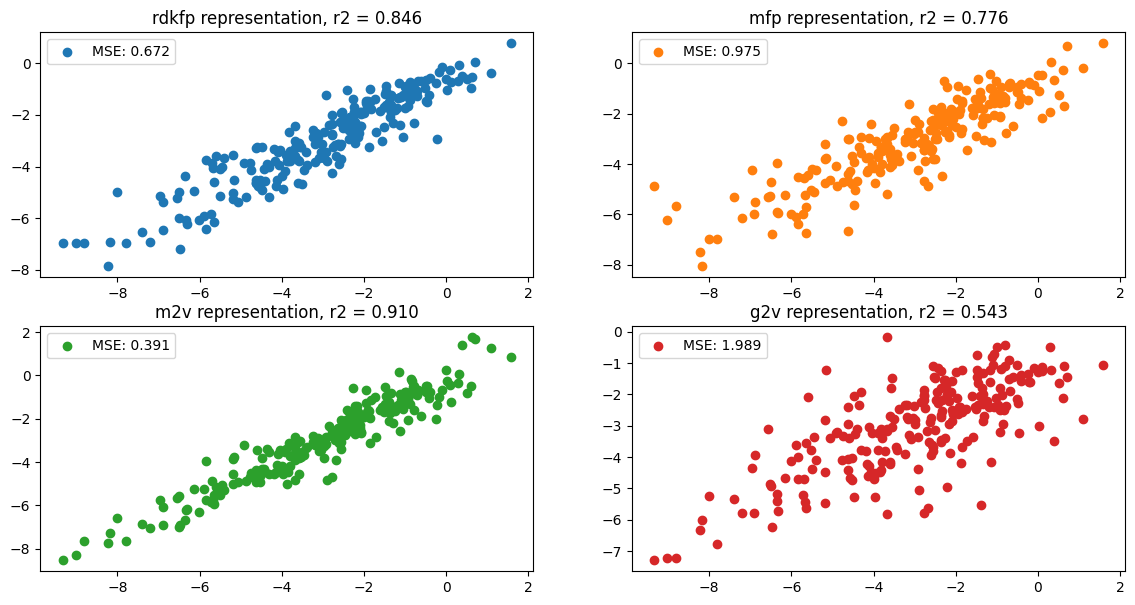

In [33]:
rdkfp_gpr_pred = pd.read_csv('./gaussian_process_regressor_predictions/rdkfp_gpr_predictions.csv', header = None)
mfp_gpr_pred = pd.read_csv('./gaussian_process_regressor_predictions/mfp_gpr_predictions.csv', header = None)
m2v_gpr_pred = pd.read_csv('./gaussian_process_regressor_predictions/m2v_gpr_predictions.csv', header = None)
g2v_gpr_pred = pd.read_csv('./gaussian_process_regressor_predictions/g2v_gpr_predictions.csv', header = None)

gpr_pred = [rdkfp_gpr_pred, 
            mfp_gpr_pred, 
            m2v_gpr_pred, 
            g2v_gpr_pred]
gpr_title = ["rdkfp", "mfp", "m2v", "g2v"]
colors = plt.get_cmap("tab10")

def R_plots(pred_list):
  fig, ax = plt.subplots(2,2, figsize = (14, 7))
  count = 0
  for graph, axis in zip(gpr_pred, ax.flatten()):
    axis.scatter(y_test_rdk,graph, color = colors(count), label = f"MSE: {mean_squared_error(y_test_rdk,graph):.3f}")
    axis.set_title(f"{gpr_title[count]} representation, r2 = {r2_score(y_test_rdk,graph):.3f}")
    axis.legend()
    count += 1
R_plots(gpr_pred)

# Conclusion on using Gaussian Process Regressor model 

Using this model resulted in a significant increase r2 score due to the high interpolation ability of gaussian process regressor model. In this model, the r2 score using mol2vec is the highest (0.91) followed by rdkit fingerprint (0.84), morgan fingerprint (0.77), and lastly, graph2vec (0.54). 

# Overall conclusion

All in all, we have managed to come out with 4 different molecular representation methods. 2 of which were fingerprint methods achieved using different algorithm and the remaining 2 are obtained from models inspired by natural language processing model such as word2vec and doc2vec. Both nlp inspired models results in a high dimension vector representations. In this event, we managed to show that mol2vec possess a greater representation ability in solubility prediction. In addition, we also compared different models namely, multivariate linear regression, random tree forest regressor, gradient boosting regressor and gaussian process regressor. In this case, gaussian process regressor shows the highest learning and predicting abililty which is mostly due to its abilitly to interpolate and extrapolate data well. In addition, gaussian process model is a non parametric with a bayesian approach to regression which works well in situation with small dataset which is a problem that we are currently facing. Nevertheless, we still managed to acheive a high regression value of 0.91 using mol2vec embeddings to predict molecular solubililty. 